
#                                           ASSIGNMENT -- 2

#### Declaring all the necessary inbuilt modules for part 1 and 2 of the assignment.

In [1]:
from keras.datasets import cifar10
from cv2 import cvtColor, COLOR_BGR2GRAY, COLOR_GRAY2RGB, imshow

import numpy as np
import random
from random import choice

from scipy.spatial.distance import euclidean
from sklearn.metrics import pairwise_distances
!pip install validclust
from validclust import dunn
from sklearn.metrics import silhouette_samples,silhouette_score


from sklearn.cluster import KMeans
from keras.models import Model
from keras import Input
from keras.layers import Dense, Reshape, Flatten

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')


#### Loading the cifar10 data set with 50000 training and 10000 test data sets respectively.

In [2]:

#Loading the Cifar-10 data set.
(X_Train, Y_Train), (X_Test, Y_Test) = cifar10.load_data()


#### Data Normalization.

In [4]:
#Converting the obtained images in Train and Test data set to Gray scale. 

X_Train = np.array([cvtColor(image, COLOR_BGR2GRAY) for image in X_Train])
X_Test = np.array([cvtColor(image, COLOR_BGR2GRAY) for image in X_Test])




# Normalization of Train and Test data set.


X_Train = X_Train.astype('float32')
X_Train = X_Train/255.0

X_Test = X_Test.astype('float32')
X_Test = X_Test/255.0




#### Initializing the number of centroids.

In [5]:
No_of_Clusters=10

## Implementing the functionality of K-Means algorithm on Test Dataset.

#### Varibale initialization.

In [6]:
#Reshaping the Test input data from (10000,32,32) to (10000, 1024).
X_Test = X_Test.reshape(len(X_Test),-1)


#K-Means step 1 -- Initilalizing the centroids of the data set randomly.
np.random.seed(2)
List_of_Random_Indices = np.random.choice(X_Test.shape[0], No_of_Clusters, replace = False)
cluster_Label = X_Test[List_of_Random_Indices,:]


#Declaring an array that holds the cluster label for each data point in the set.
Cluster_to_Dataset_Label = np.full(X_Test.shape[0], -1)

samples, features=X_Test.shape

### K-Means

In [9]:
for _ in range(15):
    
     #K-Means step 2 -- Based on the euclidian distance, assign each data point i to one of the cluster label j.
    for i in range(samples):
        
         a=[]
        
         for j in range(No_of_Clusters):
            
             #Calculating the euclidian distance between each data point and each of the centroid.
             #Since No_of_clusters is 10, 10 distance values are determined and stored temporarily in the array a.
             a.append(np.array([euclidean(X_Test[i],cluster_Label[j] )]))
        
         #The Index of the value in the array a with minimum distance value is stored in the below array.
         Cluster_to_Dataset_Label[i] = np.argmin(a)


    #K-Means step 3 -- Determine mean of each cluster among it's own data points 
      #and assign this mean to the cluster as the new cluster label (centorid).    

    for c in range(len(cluster_Label)):

        points_in_this_cluster = []

        for dp in range(samples):
            
            if Cluster_to_Dataset_Label[dp] == c:
                # Updated_Label = np.mean(np.array([X_Test[dp]]), axis = 0)
                points_in_this_cluster.append(X_Test[dp])
        
        Updated_Label = np.mean(points_in_this_cluster, axis = 0)
        cluster_Label[c] = Updated_Label

        




#### Estimating the accuracy of the model.

In [10]:

 #Calculating Dunn value.
dist = pairwise_distances(X_Test)
Dunn_Score=dunn(dist, Cluster_to_Dataset_Label)
print("\n\nDunn value for the given data set is ", Dunn_Score)

#Calculating Average Silhouette Score.
Average_Silhouette_Score=silhouette_score(X_Test, Cluster_to_Dataset_Label)
print("\nAverage Silhouette Score for the given dataset is: ", Average_Silhouette_Score)




Dunn value for the given data set is  0.09304254

Average Silhouette Score for the given dataset is:  0.054118443


## Implementing the functionality of Auto-encoders along with K-Means algorithm on Train dataset.

#### Varibale Initialization

In [75]:
active_neurons = 128

rand_state_value=200

#### Auto-Encoder

In [91]:

input_encoder = Input(shape=(1024,))
output_encoder = Dense(active_neurons, activation='linear')(input_encoder)

output_decoder = Dense(1024, activation="linear")(output_encoder)


autoencoder_final = Model(input_encoder, output_decoder, name='autoencoder_final')
autoencoder_final.summary()




Model: "autoencoder_final"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1024)]            0         
                                                                 
 dense_16 (Dense)            (None, 128)               131200    
                                                                 
 dense_17 (Dense)            (None, 1024)              132096    
                                                                 
Total params: 263,296
Trainable params: 263,296
Non-trainable params: 0
_________________________________________________________________


#### Encoder Model

In [92]:
encoder_final = Model(input_encoder, output_encoder)


#### Decoder Model

In [93]:
encoded_input = Input(shape=(active_neurons,))

decoder_layer = autoencoder_final.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))



In [94]:
autoencoder_final.compile(optimizer='adam', loss='mse')


#### Training with the help of Autoencoder.

In [98]:
X_Train = X_Train.reshape(-1, 32*32)



autoencoder_final.fit(X_Train,X_Train,epochs=50, batch_size=200)   
    

Epoch 1/50
250/250 [==============================] - 4s 16ms/step - loss: 0.0039
Epoch 2/50
250/250 [==============================] - 3s 14ms/step - loss: 0.0039
Epoch 3/50
250/250 [==============================] - 3s 13ms/step - loss: 0.0039
Epoch 4/50
250/250 [==============================] - 3s 13ms/step - loss: 0.0038
Epoch 5/50
250/250 [==============================] - 3s 13ms/step - loss: 0.0038
Epoch 6/50
250/250 [==============================] - 3s 13ms/step - loss: 0.0038
Epoch 7/50
250/250 [==============================] - 3s 13ms/step - loss: 0.0038
Epoch 8/50
250/250 [==============================] - 3s 13ms/step - loss: 0.0038
Epoch 9/50
250/250 [==============================] - 3s 13ms/step - loss: 0.0038
Epoch 10/50
250/250 [==============================] - 3s 13ms/step - loss: 0.0039
Epoch 11/50
250/250 [==============================] - 3s 14ms/step - loss: 0.0038
Epoch 12/50
250/250 [==============================] - 3s 13ms/step - loss: 0.0038
Epoch 13/50
2

#### Prediction using encoder and Decoder.

In [99]:


encoded_imgs = encoder_final.predict(X_Train)
decoded_imgs = decoder.predict(encoded_imgs)



In [ ]:
#### COmparision between orginal images and Decoded images.

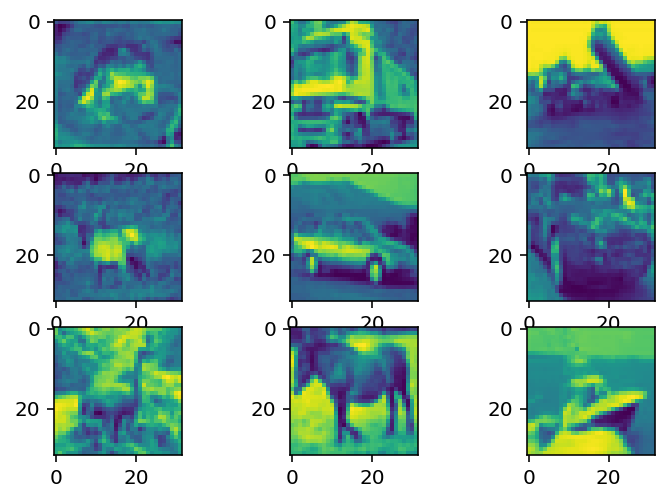

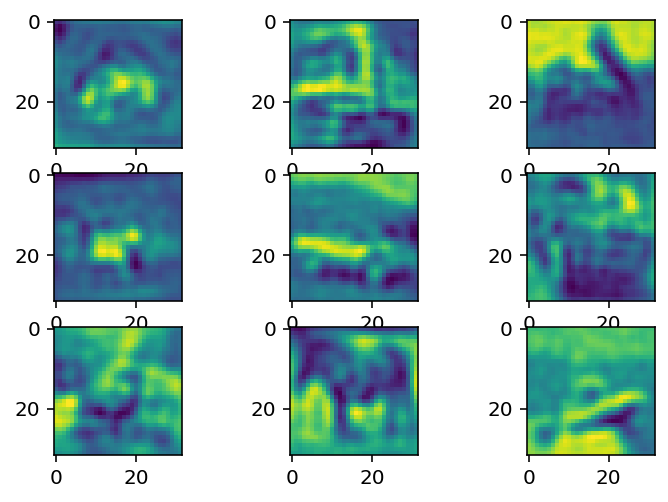

In [100]:
X_Train = X_Train.reshape(50000,32,32)
for img in range(9):
    pyplot.subplot(330 + 1 + img)
    pyplot.imshow(X_Train[img])
pyplot.show()






for img in range(9):
    pyplot.subplot(330 + 1 + img)
    pyplot.imshow(decoded_imgs[img].reshape(32,32))
pyplot.show()



In [84]:
### Implementing k-means algorithm on the encoder prediction output "encoder_prediction".

In [101]:

kmeans_cluster_output = KMeans(n_clusters=No_of_Clusters, random_state=rand_state_value).fit_predict(encoded_imgs)

In [86]:
#### Estimating the accuracy of K-Means model on encoder prediction data.

In [102]:

#Calculating Average Silhouette Score.
Average_Silhouette_Score=silhouette_score(encoded_imgs, kmeans_cluster_output)
print("\nAverage Silhouette Score for the given dataset is: ", Average_Silhouette_Score)



Average Silhouette Score for the given dataset is:  0.024419282
